Based off of Calc12_4_Mats1and3.m

Converted from MATLAB to Python, retaining all variables, names, and outputs

In [2]:
import pandas as pd
import jax.numpy as jnp
import numpy as onp
import matplotlib.pyplot as plt

In [4]:
# Define material properties
material_name = 'VF_12_4_Mats1and3_NiZnCu_FeO4_Composite_About80µm9%VolumeInEpoxy_AND_About80µm16-7%VolumeInEpoxy'

# Given values for permeability (χ_m) equation 1
B_x1 = 1.23
C_x1 = 1.499
D_x1 = 0.583

# Given values for permittivity (ε(f)) equation 1
B_ep1 = (1.57) + (5E-002j)
C_ep1 = (9E-002) + (0.14j)
D_ep1 = (-1.7) - (0.25j)
E_ep1 = (1.71) + (0.12j)
F_ep1 = (5E-002) - (14.7j)
G_ep1 = (1.52) + (43.6j)

# Given values for permeability (χ_m) equation 2
B_x2 = 0.34
C_x2 = 1.8694
D_x2 = 0.8412

# Given values for permittivity (ε(f)) equation 2
B_ep2 = 2.47 + 0.26j
C_ep2 = 8E-002 - 0.14j
D_ep2 = -0.61 + 0.68j
E_ep2 = -0.17 + 0.48j
F_ep2 = 0.66 - 7E-002j
G_ep2 = 10.66 - 12.9j
H_ep2 = -18.6 + 10.47j

# Volume fraction
f = 0.09

In [5]:
# Define frequency range (GHz)
f_min = 0.2;  # Hz
f_max = 10; # Hz
num_points = 99; # Number of frequency points
frequencies = onp.linspace(f_min, f_max, num_points)

In [11]:
# Compute permeability μ(f) exactly as given in the equation
x_1 = B_x1 * (1 - 1j * frequencies / D_x1) / (1 - ((frequencies / (C_x1))**2) - (1j * (frequencies / (D_x1))))

# Compute permeability μ(f) exactly as given in the equation TO DO
x_2 = x_2 = B_x2 * (1 - 1j * frequencies / D_x2) / (1 - ((frequencies / (C_x2))**2) - (1j * (frequencies / (D_x2))))

# Compute permittivity ε1(f) (Real part)
e_1 = B_ep1 + C_ep1 * (frequencies ** D_ep1) + E_ep1 * (1 - (frequencies / F_ep1)**2 - 2j * (frequencies / G_ep1))**(-1)

# Compute permittivity ε2(f) (Imaginary part)
e_2 = B_ep2 + C_ep2.real * (frequencies ** D_ep2) + C_ep2.imag * (frequencies ** E_ep2) + F_ep2 * (1 - (frequencies / G_ep2)**2 - 2j * (frequencies / H_ep2))**(-1)

# Convert chi to mu
mu_1 = x_1 + 1
mu_2 = x_2 + 1

# Use MGT relations to find effective permittivity and permeability TO DO
e_e = (e_2)*((1 + ((2 * f)*((e_1 - e_2) / (e_1 + 2*e_2)))) / (1 - f*((e_1 - e_2) / (e_1 + 2*e_2))))
mu_e = (mu_2)*((1 + ((2 * f)*((mu_1 - mu_2) / (mu_1 + 2*mu_2)))) / (1 - f*((mu_1 - mu_2) / (mu_1 + 2*mu_2))))

In [12]:
#Export to data table / .csv file

data_table = {
        'Frequency_GHz': frequencies,
        'Real_Epsilon': e_e.real,
        'Imag_Epsilon': e_e.imag,
        'Real_Mu': mu_e.real,
        'Imag_Mu': mu_e.imag
    }
df = pd.DataFrame(data_table)

df = pd.DataFrame(data_table)
df.to_csv(f'{material_name}.csv', index=False)

print(f'Data exported to {material_name}.csv')


Data exported to VF_12_4_Mats1and3_NiZnCu_FeO4_Composite_About80µm9%VolumeInEpoxy_AND_About80µm16-7%VolumeInEpoxy.csv


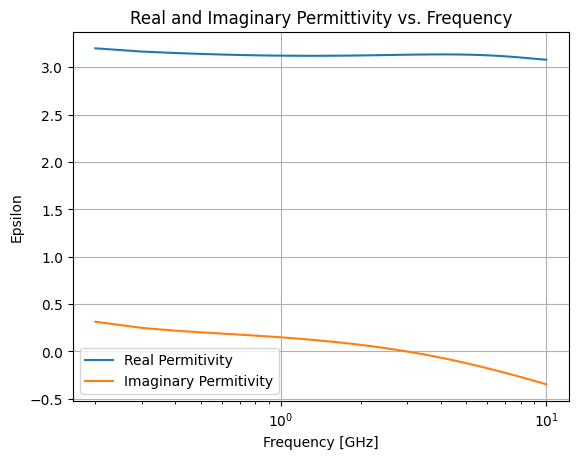

In [13]:
#Create plot 1 - Real and Imaginary Permittivity vs. Frequency (Epsilon)

plt.semilogx(frequencies, e_e.real, label='Real Permitivity')
plt.semilogx(frequencies, e_e.imag, label='Imaginary Permitivity')
plt.title('Real and Imaginary Permittivity vs. Frequency')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Epsilon')
plt.legend()
plt.grid(True)
plt.show()

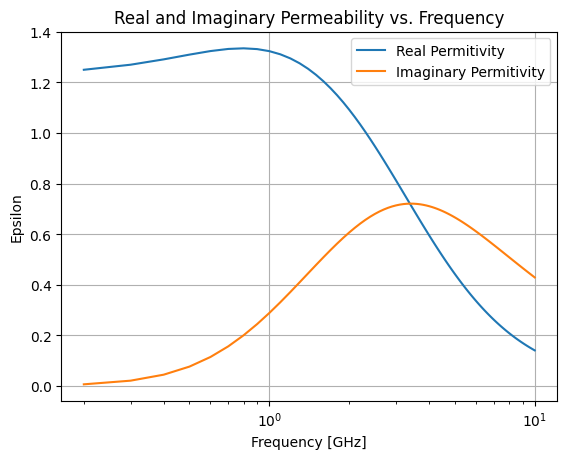

In [14]:
#Create plot 2 - Real and Imaginary Permittivity vs. Frequency (Mu)

plt.semilogx(frequencies, x_1.real, label='Real Permitivity')
plt.semilogx(frequencies, x_1.imag, label='Imaginary Permitivity')
plt.title('Real and Imaginary Permeability vs. Frequency')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Epsilon')
plt.legend()
plt.grid(True)
plt.show()